Observations and Insights
------

1. Capomulin had the highest number of datapoints (230), followed closely by Ramicane (228), while Propriva had the lowest (161).
2. 
3. 

## Dependencies and starter code

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data = mouse_metadata.merge(study_results, on = "Mouse ID", how = "outer")
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Used all tumor volumes, across all time points, to calculate for each drug
drug_groups = mouse_data.groupby(['Drug Regimen'])
mean_tumor = drug_groups['Tumor Volume (mm3)'].mean()
median_tumor = drug_groups['Tumor Volume (mm3)'].median()
variance_tumor = drug_groups['Tumor Volume (mm3)'].var()
std_dev_tumor = drug_groups['Tumor Volume (mm3)'].std()
sem_tumor = drug_groups['Tumor Volume (mm3)'].sem()
drug_data = {'Mean':mean_tumor,
            'Median':median_tumor,
            'Variance':variance_tumor,
            'StDev':std_dev_tumor,
            'SEM':sem_tumor}
drug_stats = pd.DataFrame(drug_data)
drug_stats

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

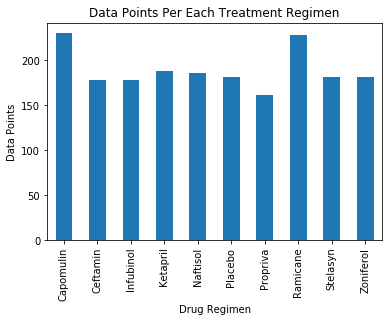

In [25]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

drug_data_count = drug_groups['Mouse ID'].count()
plt.xlabel('Drug Names')
plt.ylabel('Data Points')
plt.title('Data Points Per Each Treatment Regimen')
drug_data_count.plot.bar()

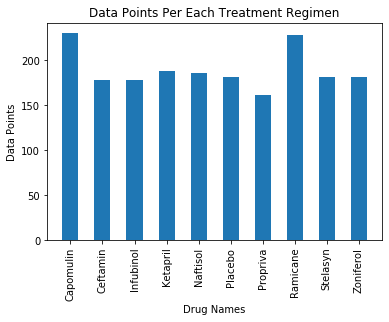

In [26]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Getting the names and sorting them alphabetially; a crude workaround, admittedly, but it works
drug_names = mouse_data['Drug Regimen'].sort_values(ascending = True).unique()

# Using the drug_names and the previous drug_data_count to create a new dataframe
drug_data_df = pd.DataFrame({'Drug Name':drug_names,'Drug Count':drug_data_count})

# Generating the bar chart off of the new dataframe
plt.bar(drug_data_df['Drug Name'], drug_data_df['Drug Count'], width = .5)
plt.xticks(rotation = 90)
plt.xlabel('Drug Names')
plt.ylabel('Data Points')
plt.title('Data Points Per Each Treatment Regimen')
plt.show()

## Pie plots

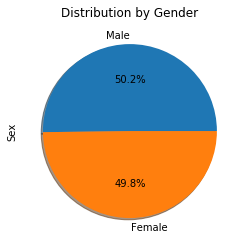

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Getting a list of unique mice in order to accurately calculate how many males vs. females
unique_mice = mouse_data.drop_duplicates(subset = 'Mouse ID')

# Counting by 'Sex' to get the information to put into the pie chart
mice_gender = unique_mice['Sex'].value_counts()

# Plotting the pie chart with pandas, including % and adding a shadow for flair
mice_gender.plot.pie(autopct = '%1.1f%%', shadow = True, title = 'Distribution by Gender')

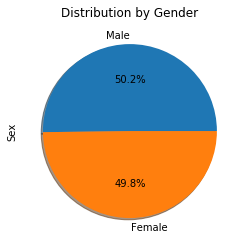

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(mice_gender, labels = labels, autopct = '%1.1f%%', shadow = True)
plt.title('Distribution by Gender')
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Drugs: Capomulin, Ramicane, Infubinol, and Ceftamin

data_capomulin = pd.DataFrame(mouse_data.loc[mouse_data['Drug Regimen'] == 'Capomulin'])
data_capomulin_sorted = data_capomulin.sort_values(by = 'Timepoint', ascending = True)
data_capomulin_grouped = data_capomulin_sorted.groupby(['Mouse ID'])
capomulin_tumor_raw = data_capomulin_grouped['Tumor Volume (mm3)'].last()
capomulin_tumor_list = []
for tumor in capomulin_tumor_raw:
    capomulin_tumor_list.append(tumor)
capomulin_tumor_sorted = pd.Series(sorted(capomulin_tumor_list))
capo_quartiles = capomulin_tumor_sorted.quantile([.25, .5, .75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq-capo_lowerq
capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)

data_ramicane = pd.DataFrame(mouse_data.loc[mouse_data['Drug Regimen'] == 'Ramicane'])
data_ramicane_sorted = data_ramicane.sort_values(by = 'Timepoint', ascending = True)
data_ramicane_grouped = data_ramicane_sorted.groupby(['Mouse ID'])
ramicane_tumor_raw = data_ramicane_grouped['Tumor Volume (mm3)'].last()
ramicane_tumor_list = []
for tumor in ramicane_tumor_raw:
    ramicane_tumor_list.append(tumor)
ramicane_tumor_sorted = pd.Series(sorted(ramicane_tumor_list))
rami_quartiles = ramicane_tumor_sorted.quantile([.25, .5, .75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)

data_infubinol = pd.DataFrame(mouse_data.loc[mouse_data['Drug Regimen'] == 'Infubinol'])
data_infubinol_sorted = data_infubinol.sort_values(by = 'Timepoint', ascending = True)
data_infubinol_grouped = data_infubinol_sorted.groupby(['Mouse ID'])
infubinol_tumor_raw = data_infubinol_grouped['Tumor Volume (mm3)'].last()
infubinol_tumor_list = []
for tumor in infubinol_tumor_raw:
    infubinol_tumor_list.append(tumor)
infubinol_tumor_sorted = pd.Series(sorted(infubinol_tumor_list))
infu_quartiles = infubinol_tumor_sorted.quantile([.25, .5, .75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq-infu_lowerq
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)

data_ceftamin = pd.DataFrame(mouse_data.loc[mouse_data['Drug Regimen'] == 'Ceftamin'])
data_ceftamin_sorted = data_ceftamin.sort_values(by = 'Timepoint', ascending = True)
data_ceftamin_grouped = data_ceftamin_sorted.groupby(['Mouse ID'])
ceftamin_tumor_raw = data_ceftamin_grouped['Tumor Volume (mm3)'].last()
ceftamin_tumor_list = []
for tumor in ceftamin_tumor_raw:
    ceftamin_tumor_list.append(tumor)
ceftamin_tumor_sorted = pd.Series(sorted(ceftamin_tumor_list))
ceft_quartiles = ceftamin_tumor_sorted.quantile([.25, .5, .75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)

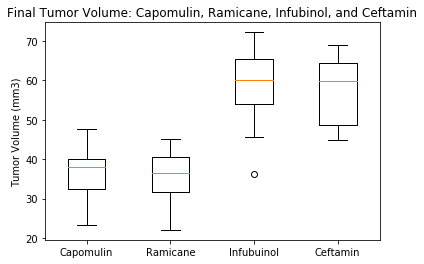

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin_tumor_sorted, ramicane_tumor_sorted, infubinol_tumor_sorted, ceftamin_tumor_sorted], labels = ['Capomulin', 'Ramicane', 'Infubuinol', 'Ceftamin'])
plt.title('Final Tumor Volume: Capomulin, Ramicane, Infubinol, and Ceftamin')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and scatter plots

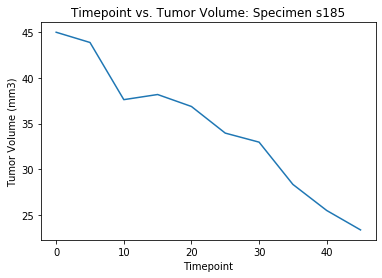

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Grabbed specimen s185 from the list of mice on the Capomulin regimen

# Creating a dataframe specifically for speciment s185
data_s185 = pd.DataFrame(mouse_data.loc[mouse_data['Mouse ID'] == 's185'])

# Plotting the line chart for timepoint vs. tumor volume, with appropriate labels
plt.plot(data_s185['Timepoint'], data_s185['Tumor Volume (mm3)'])
plt.title('Timepoint vs. Tumor Volume: Specimen s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

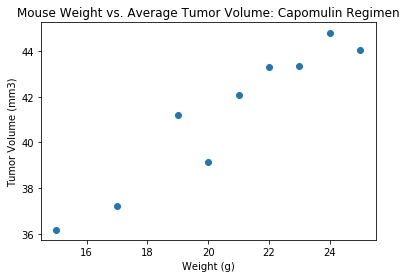

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = pd.DataFrame(mouse_data.loc[mouse_data['Drug Regimen'] == 'Capomulin'])
capomulin_group = capomulin_df.groupby(['Weight (g)'])
capomulin_weight = np.sort(capomulin_df['Weight (g)'].unique().astype(float))
capomulin_tumor_vol = capomulin_group['Tumor Volume (mm3)'].mean()

plt.scatter(capomulin_weight, capomulin_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume: Capomulin Regimen')
plt.show()

In [35]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Running linear regression on the capomulin_weight and capomulin_tumor_vol
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_weight, capomulin_tumor_vol)

# Printing the R-Squared value
print("The r-squared is: " + str(r_value))

# Calculating the correlation coefficient on the capomulin_weight and capomulin_tumor_vol
correlation = st.pearsonr(capomulin_weight, capomulin_tumor_vol)

# Printing the correlation value
print("The correlation between mouse weight and average tumor volume for the Capomulin treatment regimen is: " + str(round(correlation[0],2)))

# Side note: the calculations look incorrect to me and would benefit from a thorough examination

The r-squared is: 0.950524396185527
The correlation between mouse weight and average tumor volume for the Capomulin treatment regimen is: 0.95
